# 21 cm simulation tutorials
Ref: https://21cmfast.readthedocs.io/en/latest/tutorials/coeval_cubes.html

In [143]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
# We change the default level of the logger so that
# we can see what's happening with caching.
import logging, sys, os
logger = logging.getLogger('21cmFAST')
logger.setLevel(logging.INFO)

import py21cmfast as p21c

# For plotting the cubes, we use the plotting submodule:
from py21cmfast import plotting

# For interacting with the cache
from py21cmfast import cache_tools


In [144]:
print(f"Using 21cmFAST version {p21c.__version__}")


Using 21cmFAST version 3.3.1


In [145]:
if not os.path.exists('_cache'):
    os.mkdir('_cache')
    print("created _cache folder")

p21c.config['direc'] = '_cache'
# cache_tools.clear_cache(direc="_cache")
# print("Cache cleared")

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='x-axis [Mpc]', ylabel='y-axis [Mpc]'>)

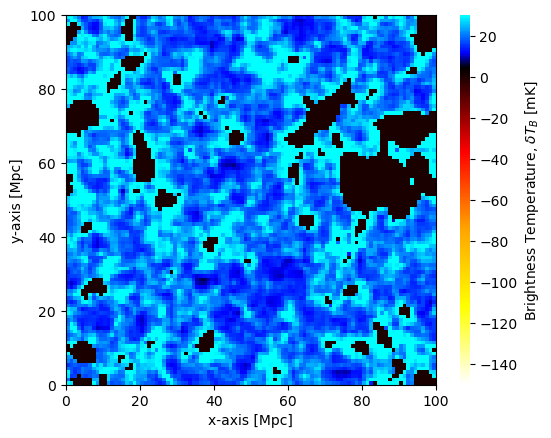

In [146]:
user_params = {"HII_DIM": 100, "BOX_LEN": 100, "USE_INTERPOLATION_TABLES": False}
coeval = p21c.run_coeval(redshift=9.0, user_params = user_params)
p21c.plotting.coeval_sliceplot(coeval, kind='brightness_temp')


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='x-axis [Mpc]', ylabel='y-axis [Mpc]'>)

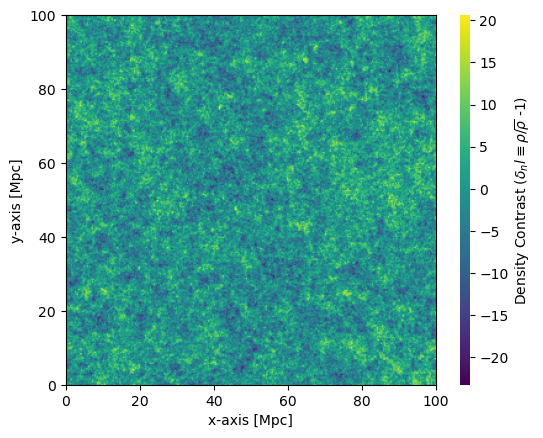

In [147]:
p21c.plotting.coeval_sliceplot(coeval, kind='hires_density', cbar_label=r'Density Contrast ($\delta_nl\equiv\rho/\overline{\rho}$ -1)')


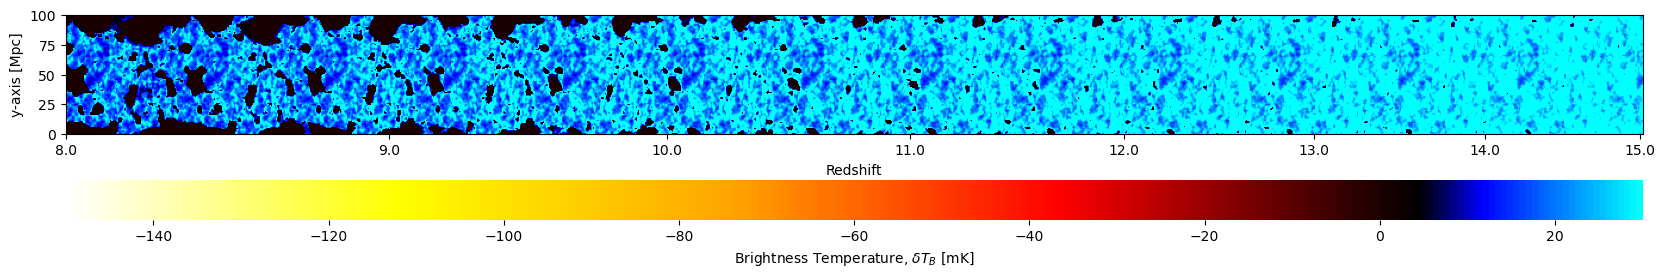

In [148]:
lc = p21c.run_lightcone(
    redshift=8.0,
    max_redshift=15.0,
    init_box = coeval.init_struct,
)
fig, ax = p21c.plotting.lightcone_sliceplot(lc)
fig.savefig("output/lightcone-btemp-8-15.png")

In [149]:
print(lc)

/opt/anaconda3/lib/python3.11/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: hires_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/opt/anaconda3/lib/python3.11/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: hires_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/opt/anaconda3/lib/python3.11/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: hires_vz
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/opt/anaconda3/lib/python3.11/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: hires_vx_2LPT
  warnings.warn(f"Trying to remove array that isn'

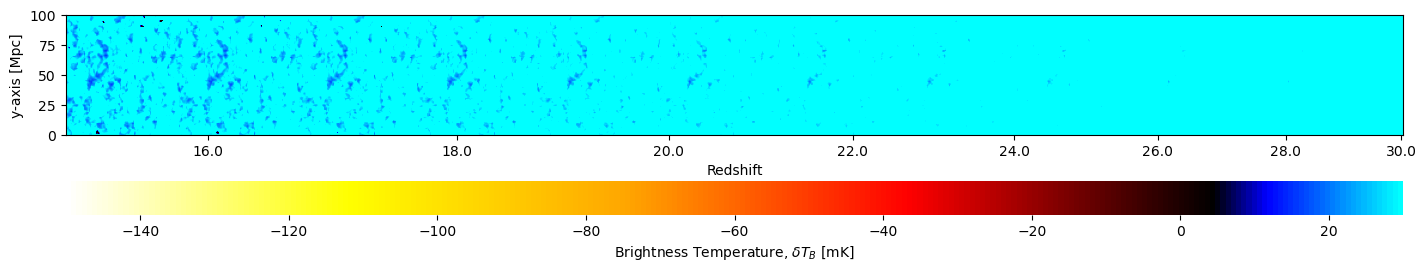

In [150]:
lc = p21c.run_lightcone(
    redshift=15.0,
    max_redshift=30.0,
    init_box = coeval.init_struct,
)
fig, ax = p21c.plotting.lightcone_sliceplot(lc)
fig.savefig("output/lightcone-btemp-15-30.png")

In [151]:
print(coeval.user_params)
print(coeval.cosmo_params)
print(coeval.astro_params)
print(coeval.flag_options)

UserParams:
    BOX_LEN                 : 100
    DIM                     : 300
    FAST_FCOLL_TABLES       : False
    HII_DIM                 : 100
    HMF                     : 1
    MINIMIZE_MEMORY         : False
    NON_CUBIC_FACTOR        : 1.0
    NO_RNG                  : False
    N_THREADS               : 1
    PERTURB_ON_HIGH_RES     : False
    POWER_SPECTRUM          : 0
    USE_2LPT                : True
    USE_FFTW_WISDOM         : False
    USE_INTERPOLATION_TABLES: False
    USE_RELATIVE_VELOCITIES : False
    
CosmoParams:
    OMb        : 0.04897468161869667
    OMm        : 0.30964144154550644
    POWER_INDEX: 0.9665
    SIGMA_8    : 0.8102
    hlittle    : 0.6766
    
AstroParams:
    ALPHA_ESC       : -0.5
    ALPHA_STAR      : 0.5
    ALPHA_STAR_MINI : 0.5
    A_LW            : 2.0
    A_VCB           : 1.0
    BETA_LW         : 0.6
    BETA_VCB        : 1.8
    F_ESC10         : 0.1
    F_ESC7_MINI     : 0.01
    F_H2_SHIELD     : 0.0
    F_STAR10        : 0.0

In [152]:
print(coeval.brightness_temp_struct.global_Tb)

19.871964


In [153]:
initial_conditions = p21c.initial_conditions(
    user_params = user_params,
)

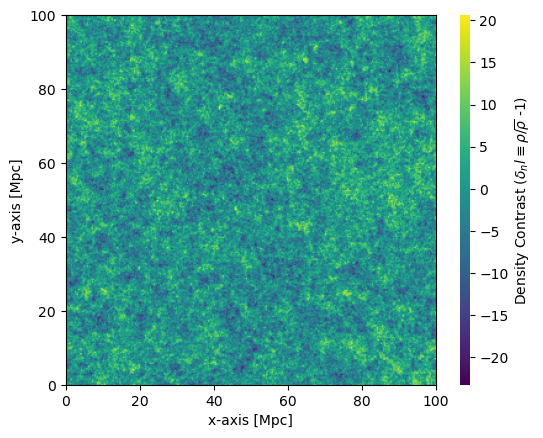

In [182]:
p21c.plotting.coeval_sliceplot(initial_conditions, "hires_density", cbar_label=r'Density Contrast ($\delta_nl\equiv\rho/\overline{\rho}$ -1)');


In [155]:
perturbed_field = p21c.perturb_field(
    redshift = 8.0,
    init_boxes = initial_conditions
)

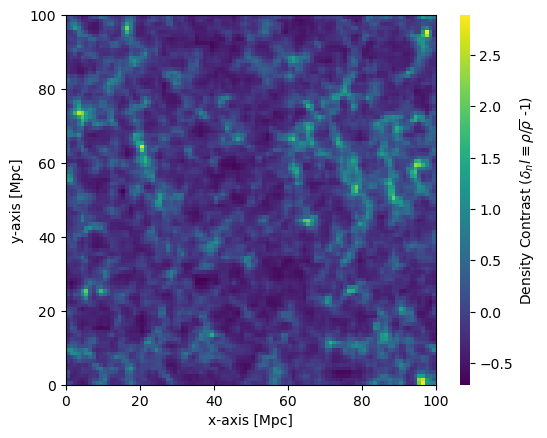

In [184]:
p21c.plotting.coeval_sliceplot(perturbed_field, "density", cbar_label=r'Density Contrast ($\delta_nl\equiv\rho/\overline{\rho}$ -1)');


/opt/anaconda3/lib/python3.11/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(


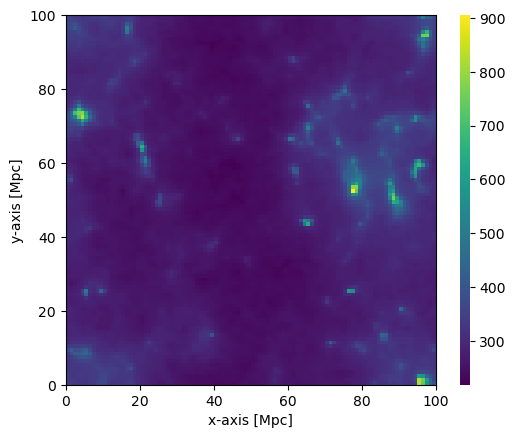

In [157]:
spin_temp = p21c.spin_temperature(
    perturbed_field = perturbed_field,
    zprime_step_factor=1.05,
)
plotting.coeval_sliceplot(spin_temp, "Ts_box");

In [158]:
ionized_field = p21c.ionize_box(
    spin_temp = spin_temp,
    zprime_step_factor=1.05,
)

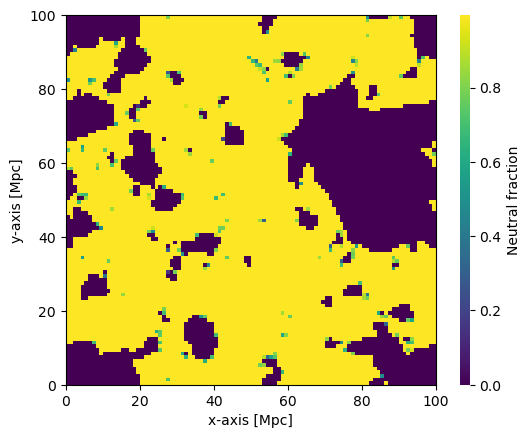

In [159]:
plotting.coeval_sliceplot(ionized_field, "xH_box");


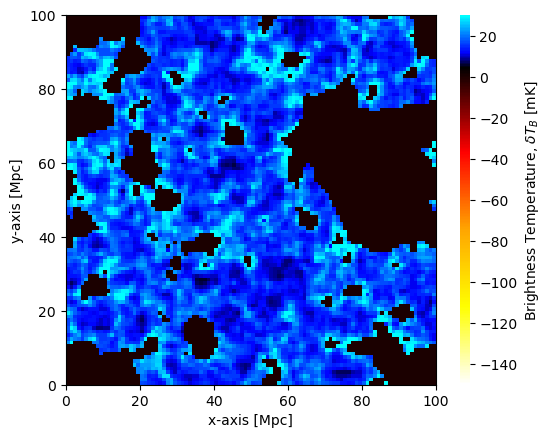

In [160]:
brightness_temp = p21c.brightness_temperature(
    ionized_box = ionized_field,
    perturbed_field = perturbed_field,
    spin_temp = spin_temp
)
plotting.coeval_sliceplot(brightness_temp);


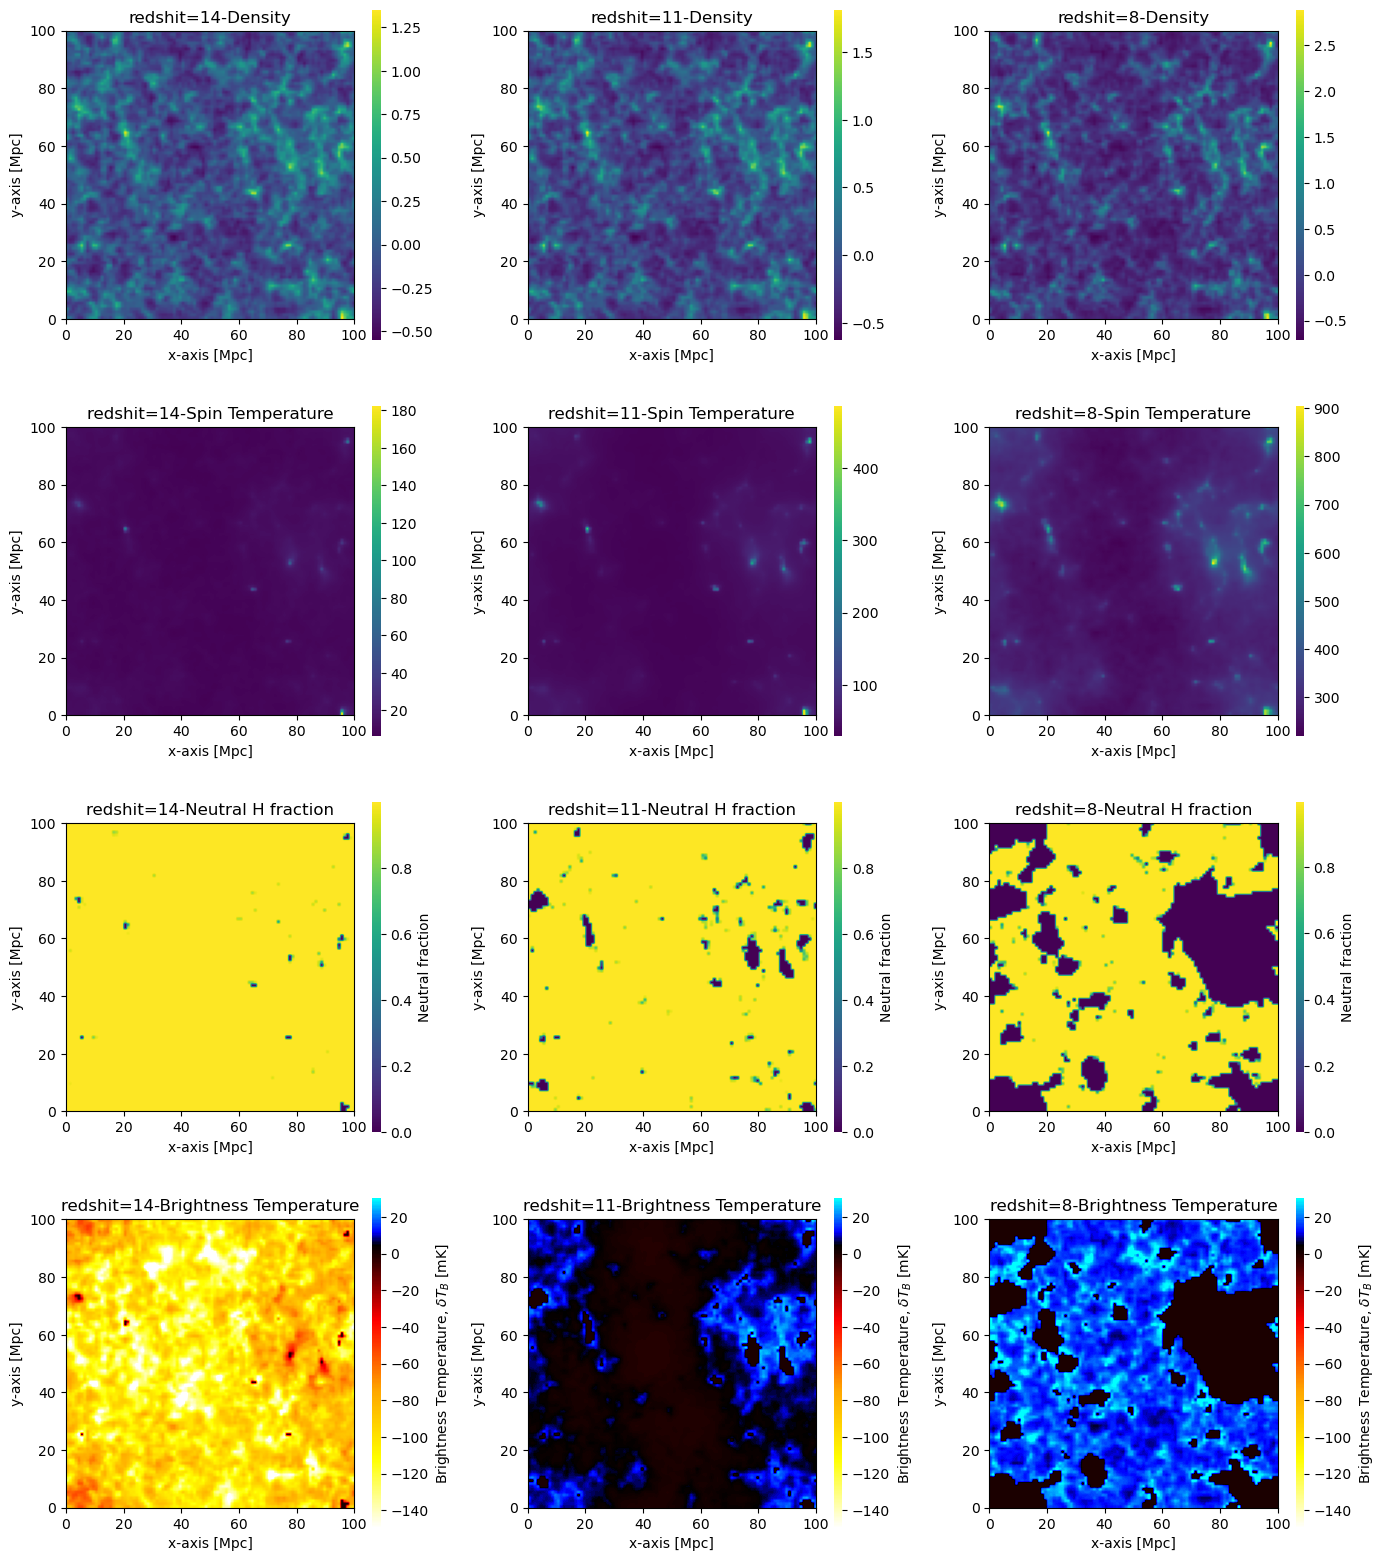

In [161]:
fig, ax = plt.subplots(4, 3, figsize=(14,16))
for i, redshift in enumerate([14,11,8]):
    #######
    # Create perturbed field at the redshift
    perturbed_field = p21c.perturb_field( redshift = redshift, init_boxes = initial_conditions)
    plotting.coeval_sliceplot(perturbed_field, "density", ax=ax[0][i], fig = fig)
    ax[0][i].title.set_text('redshit={0}-Density'.format(redshift))

    #######
    # Compute the spin temperatures
    spin_temp = p21c.spin_temperature(
        perturbed_field = perturbed_field,
        zprime_step_factor=1.05,
    )
    plotting.coeval_sliceplot(spin_temp, "Ts_box", ax=ax[1][i], fig = fig);
    ax[1][i].title.set_text('redshit={0}-Spin Temperature'.format(redshift))

    #######
    # Compute ionization
    ionized_field = p21c.ionize_box(
        spin_temp = spin_temp,
        zprime_step_factor=1.05
    )
    plotting.coeval_sliceplot(ionized_field, "xH_box", ax=ax[2][i], fig = fig)
    ax[2][i].title.set_text('redshit={0}-Neutral H fraction'.format(redshift))

    #######
    # Compute brightness temperature
    brightness_temp = p21c.brightness_temperature(
        ionized_box = ionized_field,
        perturbed_field = perturbed_field,
        spin_temp = spin_temp
    )
    plotting.coeval_sliceplot(brightness_temp, ax=ax[3][i], fig = fig)
    ax[3][i].title.set_text('redshit={0}-Brightness Temperature'.format(redshift))

    #print(coeval.brightness_temp_struct.global_Tb)
plt.tight_layout()
fig.savefig('output/redshift-8-14-all-fields.png', pad_inches=0)
